In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import mplhep as hep
import json
hep.style.use("CMS")
import re


In [10]:
#fit_dir = "../rhalph/UnfoldingSubstructure_FixedJMSCorr/FullRunII"
fit_dir = "../rhalph/UnfoldingParticleNet_07-08-23/FullRunII"
fit_dir = "../rhalph/UnfoldingSubstructure_07-08-23/FullRunII"

config = json.load(open(f"{fit_dir}/config.json","r"))
fit_results = json.load(open(f"{fit_dir}/FullRunIIfitResult.json","r"))
result = np.load(f"{fit_dir}/poi_correlation_matrix.npy", allow_pickle=True, encoding="latin1").item()
pois = result["pois"]
corr = result["correlationMatrix"]
cov = result["covarianceMatrix"]

checking if i got the poi numbering right and got the correct entries from the covariance matrix

In [11]:
for i,poi in enumerate(pois):
    print([abs(sigma) - np.sqrt(cov[i,i]) for  sigma in fit_results[poi][1:]])


[0.0, 0.0]
[-5.551115123125783e-17, -5.551115123125783e-17]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[-1.1102230246251565e-16, -1.1102230246251565e-16]
[-2.220446049250313e-16, -2.220446049250313e-16]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]


In [12]:
genbin_info = config.get("unfolding_bins",{})
m_edges = genbin_info.get("msdgen",[])
pt_edges = genbin_info.get("ptgen",[])


In [13]:
def genbins(r):
    genbin_match = re.search(r"r_ptgen(?P<pt>[0-9])_msdgen(?P<msd>[0-9])", r)
    if genbin_match:
        return tuple(map(int,genbin_match.groupdict().values()))
    else:
        return (-1,-1)
def axis_label(ipt,imjet):
    pt_gen_bin_tex = r"$p_{T,gen} \in" + f"[{pt_edges[ipt]},{pt_edges[ipt+1]})$"
    m_gen_bin_tex = r"$m_{jet,gen} \in" + f"[{m_edges[imjet]},{m_edges[imjet+1]})$"
    return pt_gen_bin_tex + " " + m_gen_bin_tex
# axis_labels = ["$\mu_{p^{%i}_{T}, m_{\mathrm{jet}}^{%i}}$" % (genbins(poi)) for poi in pois]
axis_labels = [axis_label(*genbins(poi)) for poi in pois]

In [14]:
np.min(corr)

-0.6173192741594247

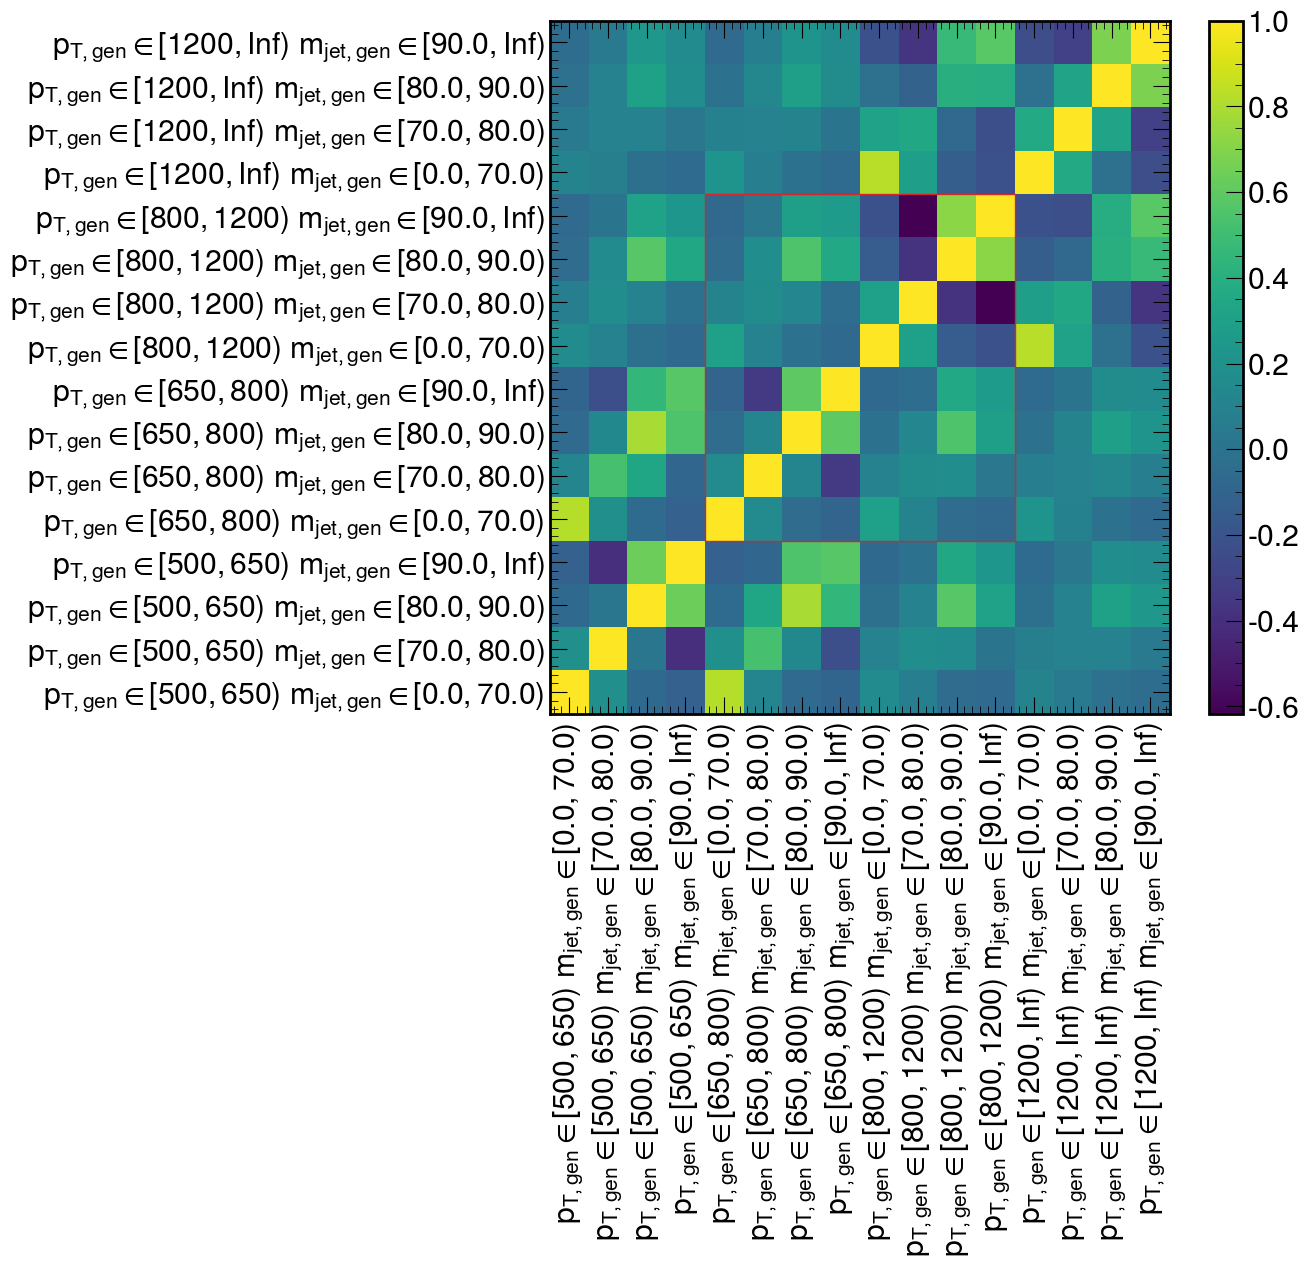

In [15]:
f,ax = plt.subplots(figsize=(10,9))

cmap = ax.pcolormesh(axis_labels, axis_labels, corr)#, cmap="RdGy")
f.colorbar(cmap,ax=ax)
plt.xticks(rotation = 90)
ax.add_patch(Rectangle((3.5,3.5),8,8 , edgecolor = "tab:red", fill=False))


In [16]:
def edge(e):
    if isinstance(e,str):
        if e == "Inf":
            return r"$\infty$"
        else: return e
    else:
        return "%i"%e


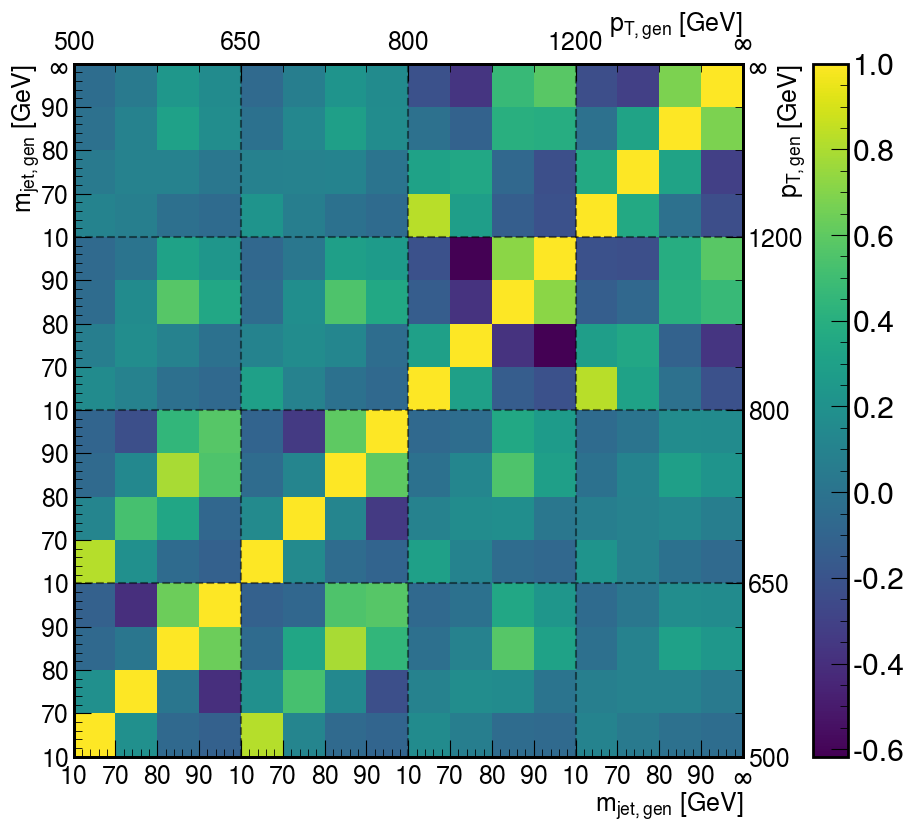

In [17]:
f,(ax,cax) = plt.subplots(1,2,figsize=(10,9), gridspec_kw={"width_ratios":[0.95,0.05]})

edges = np.array(range(len(pois)))-0.5
m_tick_labels_per_pt = [edge(e) for e in m_edges]
m_tick_labels_per_pt[0] = "10"
m_tick_labels = m_tick_labels_per_pt
# m_tick_labels_per_pt[-1] += "|0"
m_tick_labels_per_pt[-1] = "10"
m_tick_labels += m_tick_labels_per_pt[1:]*(len(pt_edges)-2)
m_tick_loc = np.concatenate([edges,[len(edges)-0.5]])-0.5
m_tick_labels[-1] = "$\infty$"


pt_tick_labels = [edge(e) for e in pt_edges]
pt_tick_loc = m_tick_loc[::len(m_edges)-1]
cmap = ax.pcolormesh(edges, edges, corr)#, cmap="RdGy")
cax.axis('off')

f.colorbar(cmap,ax=cax,fraction=1, pad=0.0)
fs = 18
for i in range(3):
    ax.plot([-1,len(pois)-1],[(1+i)*(len(m_edges)-1)-1]*2,"k--",alpha=0.5)
    ax.plot([(1+i)*(len(m_edges)-1)-1]*2,[-1,len(pois)-1],"k--",alpha=0.5)
# ax.add_patch(Rectangle((3,3),8,8 , edgecolor = "tab:red", fill=False,lw=2,ls="-"))
ax.set_xticks(m_tick_loc, m_tick_labels,fontsize=fs)
ax.set_yticks(m_tick_loc, m_tick_labels,fontsize=fs)
twinx = ax.twinx()
twiny = ax.twiny()
twinx.set_yticks(pt_tick_loc, pt_tick_labels,fontsize=fs)
twiny.set_xticks(pt_tick_loc, pt_tick_labels,fontsize=fs)
ax.set_ylabel("$m_\mathrm{jet,gen}~\mathrm{[GeV]}$",fontsize=fs,labelpad=0)
ax.set_xlabel("$m_\mathrm{jet,gen}~\mathrm{[GeV]}$",fontsize=fs,labelpad=0)
twinx.set_ylabel("$p_{T,\mathrm{gen}}~\mathrm{[GeV]}$",fontsize=fs,labelpad=-20)
twiny.set_xlabel("$p_{T,\mathrm{gen}}~\mathrm{[GeV]}$",fontsize=fs,labelpad=0)

f.savefig(f"{fit_dir}/corr_matrix.pdf",bbox_inches="tight")
